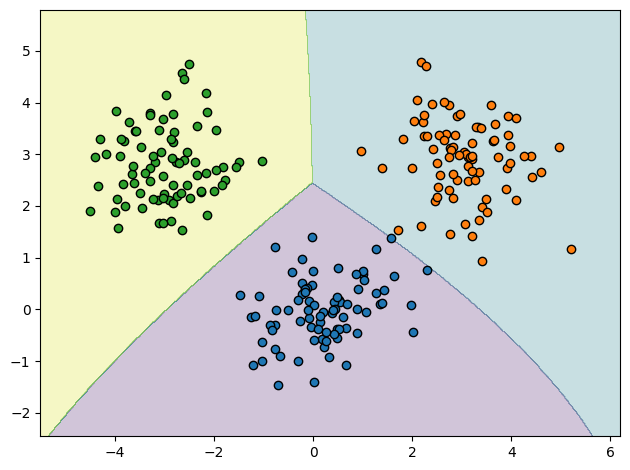

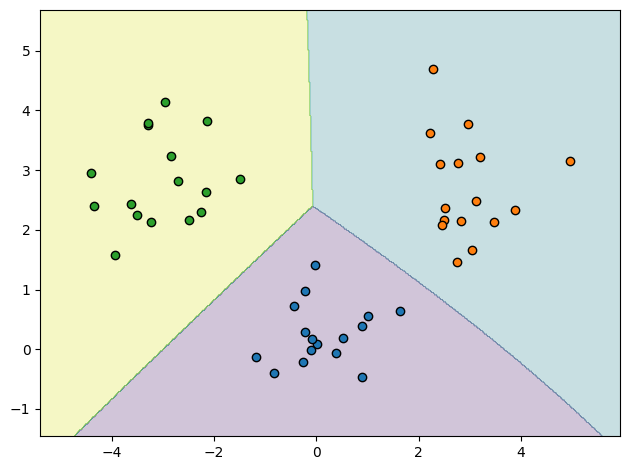

accuracy 0.9958333333333332
precision_weighted 0.9959821428571428
recall_weighted 0.9958333333333332
f1_weighted 0.9958303624480095


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score

def visualize_classifier(classifier, X, y, title=''):
    x_min, x_max = X[:,0].min()-1.0, X[:,0].max()+1.0
    y_min, y_max = X[:,1].min()-1.0, X[:,1].max()+1.0
    h = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.25)
    for cls in np.unique(y):
        pts = X[y==cls]
        plt.scatter(pts[:,0], pts[:,1], edgecolor='k')
    plt.title(title)
    plt.tight_layout()
    plt.show()

rng = np.random.default_rng(7)
n_per = 80
means = [(0,0),(3,3),(-3,3)]
covs = [np.array([[0.8,0.2],[0.2,0.5]]),
        np.array([[0.7,-0.1],[-0.1,0.6]]),
        np.array([[0.6,0.0],[0.0,0.6]])]
X_list, y_list = [], []
for i,(m,c) in enumerate(zip(means,covs)):
    Xc = rng.multivariate_normal(m,c, size=n_per)
    X_list.append(Xc); y_list.append(np.full(n_per, i))
X = np.vstack(X_list); y = np.concatenate(y_list)

clf = GaussianNB().fit(X, y)
visualize_classifier(clf, X, y)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)
clf2 = GaussianNB().fit(Xtr, ytr)
visualize_classifier(clf2, Xte, yte)
for metric in ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']:
    scores = cross_val_score(GaussianNB(), X, y, scoring=metric, cv=3)
    print(metric, scores.mean())
